# Chapter 2 Notebook
Just some code I wrote as I followed along in chapter 2 of [_Practical Time Series Analysis_](https://www.amazon.com/dp/1492041653/ref=cm_sw_em_r_mt_dp_3YTN6VJT9KEB682ZV1FC)


In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from dateutil.relativedelta import relativedelta

import math
import random

In [394]:
RAND_SEED=42


In [395]:
YearJoined_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/git/BookRepo/Ch02/data/year_joined.csv")
emails_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/git/BookRepo/Ch02/data/emails.csv")
donations_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/git/BookRepo/Ch02/data/donations.csv")


In [396]:
donations_df.shape


(2676, 3)

In [397]:
donations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   amount     2676 non-null   float64
 1   timestamp  2676 non-null   object 
 2   user       2676 non-null   float64
dtypes: float64(2), object(1)
memory usage: 62.8+ KB


In [398]:
donations_df.describe()

,amount,user
count,2676.000000,2676.000000
mean,178.447309,477.896114
std,370.440543,287.538612
min,25.000000,0.000000
25%,25.000000,220.000000
50%,50.000000,474.000000
75%,75.000000,711.250000
max,2000.000000,998.000000


In [399]:
donations_df.head()

,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0
3,50.0,2016-07-06 12:24:55,0.0
4,50.0,2016-05-11 18:13:04,1.0


In [400]:
YearJoined_df.shape


(1000, 3)

In [401]:
YearJoined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        1000 non-null   int64 
 1   userStats   1000 non-null   object
 2   yearJoined  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [402]:
YearJoined_df.describe()

,user,yearJoined
count,1000.000000,1000.00000
mean,499.500000,2016.74100
std,288.819436,1.27967
min,0.000000,2014.00000
25%,249.750000,2016.00000
50%,499.500000,2017.00000
75%,749.250000,2018.00000
max,999.000000,2018.00000


In [403]:
YearJoined_df.head()


,user,userStats,yearJoined
0,0,silver,2014
1,1,silver,2015
2,2,silver,2016
3,3,bronze,2018
4,4,silver,2018


In [404]:
emails_df.shape

(25488, 3)

In [405]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25488 entries, 0 to 25487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   emailsOpened  25488 non-null  float64
 1   user          25488 non-null  float64
 2   week          25488 non-null  object 
dtypes: float64(2), object(1)
memory usage: 597.5+ KB


In [406]:
emails_df.describe()

,emailsOpened,user
count,25488.000000,25488.000000
mean,2.403327,498.902935
std,0.799071,282.308236
min,1.000000,1.000000
25%,2.000000,252.000000
50%,3.000000,518.000000
75%,3.000000,727.000000
max,3.000000,998.000000


In [407]:
emails_df.head()


,emailsOpened,user,week
0,3.0,1.0,2015-06-29 00:00:00
1,2.0,1.0,2015-07-13 00:00:00
2,2.0,1.0,2015-07-20 00:00:00
3,3.0,1.0,2015-07-27 00:00:00
4,1.0,1.0,2015-08-03 00:00:00


In [408]:
No_of_Diff_Stats_per_Users_df = YearJoined_df.groupby("user")["userStats"].count()
No_of_Diff_Stats_per_Users_df.head()


user
0    1
1    1
2    1
3    1
4    1
Name: userStats, dtype: int64

In [409]:
No_of_Diff_Stats_per_Users_df[No_of_Diff_Stats_per_Users_df > 1]


Series([], Name: userStats, dtype: int64)

**None** of the users had anymore than 1 status

Does any member have more than one entry in `YearJoined_df`?



In [410]:
YearJoined_df.groupby("user").count().groupby("userStats").count()



,yearJoined
userStats,
1,1000


In [411]:
YearJoined_df["user"].count()


1000

1000 different users and only 1000 different status


Any weeks with 0 opened emails?



In [412]:
emails_df[emails_df["emailsOpened"] < 1]


,emailsOpened,user,week


There are zero. So either there is an entry for every possible week per user or there are missing weeks, that will have to be assumed to be zero

Below is a list of the number of emails opened per week for a single user


In [413]:
emails_df[emails_df["user"] == 998]

,emailsOpened,user,week
25464,1.0,998.0,2017-12-04 00:00:00
25465,3.0,998.0,2017-12-11 00:00:00
25466,3.0,998.0,2017-12-18 00:00:00
25467,3.0,998.0,2018-01-01 00:00:00
25468,3.0,998.0,2018-01-08 00:00:00
25469,2.0,998.0,2018-01-15 00:00:00
25470,3.0,998.0,2018-01-22 00:00:00
25471,2.0,998.0,2018-01-29 00:00:00
25472,3.0,998.0,2018-02-05 00:00:00
25473,3.0,998.0,2018-02-12 00:00:00


There are some weeks missing.

Let's see how many weeks are missing

First create new columns that have the `week` column as a `datetime` objects



In [414]:
emails_df["week_dt"] = pd.to_datetime(emails_df["week"])


In [415]:
emails_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25488 entries, 0 to 25487
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   emailsOpened  25488 non-null  float64       
 1   user          25488 non-null  float64       
 2   week          25488 non-null  object        
 3   week_dt       25488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 796.6+ KB


In [416]:
# how many weeks starting from the earliest to latest dates in the dataframe for a single user
print(((max(emails_df[emails_df["user"] == 998].week_dt) - min(emails_df[emails_df["user"] == 998].week_dt)).days)/7 + 1," weeks")

26.0  weeks


In [417]:
# how many different weeks are *actually* in the dataframe
emails_df[emails_df["user"] == 998].shape[0]

24

So there are 26 weeks between the earliest and latest entries in `emails_df` for user 998 but only 24 different weekly entries in the data frame for user 998

Books says to input 0 for all missing weeks between the time of the earliest entry and the latest entry

Using all of the weekly timestamps in `email_df` create a new list of indices, one index per unique `week_dt` value found in `email_df` across all users


In [418]:
all_indices = pd.MultiIndex.from_product((set(emails_df.week_dt),set(emails_df.user)))


In [419]:
all_indices


MultiIndex([('2015-05-25',   1.0),
            ('2015-05-25',   3.0),
            ('2015-05-25',   5.0),
            ('2015-05-25',   6.0),
            ('2015-05-25',   9.0),
            ('2015-05-25',  10.0),
            ('2015-05-25',  14.0),
            ('2015-05-25',  16.0),
            ('2015-05-25',  20.0),
            ('2015-05-25',  21.0),
            ...
            ('2017-04-17', 973.0),
            ('2017-04-17', 977.0),
            ('2017-04-17', 982.0),
            ('2017-04-17', 984.0),
            ('2017-04-17', 987.0),
            ('2017-04-17', 991.0),
            ('2017-04-17', 992.0),
            ('2017-04-17', 993.0),
            ('2017-04-17', 995.0),
            ('2017-04-17', 998.0)],
           length=93247)

Create a new data frame where each user has events for the same set of week time stamps. If the time stamp for a user is not found in `email_df` it will be assigned 0 for `emailOpened`

In [420]:
emails_all_df = emails_df.set_index(["week_dt","user"]).reindex(all_indices, fill_value=0).reset_index()


In [421]:
emails_all_df.head()


,level_0,level_1,emailsOpened,week
0,2015-05-25,1.0,0.0,0
1,2015-05-25,3.0,0.0,0
2,2015-05-25,5.0,0.0,0
3,2015-05-25,6.0,0.0,0
4,2015-05-25,9.0,0.0,0


In [422]:
emails_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93247 entries, 0 to 93246
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   level_0       93247 non-null  datetime64[ns]
 1   level_1       93247 non-null  float64       
 2   emailsOpened  93247 non-null  float64       
 3   week          93247 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.8+ MB


In [423]:
#renaming the columns
emails_all_df.columns = ["week_dt","user","emailsOpened","to_be_dropped"]

In [424]:
emails_all_df.head()


,week_dt,user,emailsOpened,to_be_dropped
0,2015-05-25,1.0,0.0,0
1,2015-05-25,3.0,0.0,0
2,2015-05-25,5.0,0.0,0
3,2015-05-25,6.0,0.0,0
4,2015-05-25,9.0,0.0,0


In [425]:
emails_all_df.drop(["to_be_dropped"],axis=1,inplace=True)

In [426]:
emails_all_df.head()

,week_dt,user,emailsOpened
0,2015-05-25,1.0,0.0
1,2015-05-25,3.0,0.0
2,2015-05-25,5.0,0.0
3,2015-05-25,6.0,0.0
4,2015-05-25,9.0,0.0


In [427]:
emails_all_df.shape

(93247, 3)

But it's possible that there are now dates with 0 in them for a user before the date at which said user had `emailsOpened > 0`
This analysis assumes that all such dates should not exist for the user


In [428]:
#first create a list of cut-off dates
cut_off_dates_df = emails_all_df.groupby("user").week_dt.agg(["min","max"]).reset_index()


In [429]:
cut_off_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   user    539 non-null    float64       
 1   min     539 non-null    datetime64[ns]
 2   max     539 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 12.8 KB


In [430]:
cut_off_dates_df = cut_off_dates_df.reset_index()

In [431]:
cut_off_dates_df

,index,user,min,max
0,0,1.0,2015-02-09,2018-05-28
1,1,3.0,2015-02-09,2018-05-28
2,2,5.0,2015-02-09,2018-05-28
3,3,6.0,2015-02-09,2018-05-28
4,4,9.0,2015-02-09,2018-05-28
...,...,...,...,...
534,534,991.0,2015-02-09,2018-05-28
535,535,992.0,2015-02-09,2018-05-28
536,536,993.0,2015-02-09,2018-05-28
537,537,995.0,2015-02-09,2018-05-28


In [432]:
#Now clean out all rows for each user where the row comes before that user's earliest nonzero emailsopen

for _, row in cut_off_dates_df.iterrows():
    member = row["user"]
    start_date = row["min"]
    end_date = row["max"]

    member_selector = emails_all_df["user"] == member

    emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt < start_date].index,inplace=True)
    emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt > end_date].index, inplace=True)

<ipython-input-432-a2acef8b40fe>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt < start_date].index,inplace=True)
<ipython-input-432-a2acef8b40fe>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt > end_date].index, inplace=True)
<ipython-input-432-a2acef8b40fe>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt < start_date].index,inplace=True)
<ipython-input-432-a2acef8b40fe>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt > end_date].index, inplace=True)
<ipython-input-432-a2acef8b40fe>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ema

In [433]:
emails_all_df.head()

,week_dt,user,emailsOpened
0,2015-05-25,1.0,0.0
1,2015-05-25,3.0,0.0
2,2015-05-25,5.0,0.0
3,2015-05-25,6.0,0.0
4,2015-05-25,9.0,0.0


In [434]:
emails_all_df.tail()


,week_dt,user,emailsOpened
93242,2017-04-17,991.0,0.0
93243,2017-04-17,992.0,0.0
93244,2017-04-17,993.0,0.0
93245,2017-04-17,995.0,3.0
93246,2017-04-17,998.0,0.0


In [435]:
emails_all_df.shape


(93247, 3)

Author wants to relate donations to the number of emails opened per week.

Current donations are recorded in `donations_df`  on a non-weekly basis.

So to relate the two will first aggregate donations to a weekly number


In [436]:
donations_df["timestamp_dt"] = pd.to_datetime(donations_df["timestamp"])


In [437]:
donations_df.set_index("timestamp_dt",inplace=True)
donations_df.head()

,amount,timestamp,user
timestamp_dt,,,
2017-11-12 11:13:44,25.0,2017-11-12 11:13:44,0.0
2015-08-25 19:01:45,50.0,2015-08-25 19:01:45,0.0
2015-03-26 12:03:47,25.0,2015-03-26 12:03:47,0.0
2016-07-06 12:24:55,50.0,2016-07-06 12:24:55,0.0
2016-05-11 18:13:04,50.0,2016-05-11 18:13:04,1.0


In [438]:
agg_donations = donations_df.groupby("user").apply(lambda df: df["amount"].resample("W-MON").sum().dropna())


In [439]:
#I think this is needed maybe a bug in her code
agg_donations = agg_donations.reset_index()


In [440]:
agg_donations.head()


,user,timestamp_dt,amount
0,0.0,2015-03-30,25.0
1,0.0,2015-04-06,0.0
2,0.0,2015-04-13,0.0
3,0.0,2015-04-20,0.0
4,0.0,2015-04-27,0.0


Now will join `agg_donations` to `email_all_df` by date

In [441]:
merged_df = pd.DataFrame()


In [442]:
for user, user_emails in emails_all_df.groupby("user"):
    #print(user,user_email)
    user_donations = agg_donations[agg_donations["user"] == user]

    user_donations.set_index("timestamp_dt", inplace=True)
    user_emails.set_index("week_dt", inplace=True)

    user_emails = emails_all_df[emails_all_df["user"] == user]
    user_emails = user_emails.sort_values("week_dt").set_index("week_dt")

    df = pd.merge(user_emails, user_donations, how="left", left_index=True, right_index=True)
    df.fillna(0, inplace=True)
    df["user"] = df.user_x

    if merged_df.empty:
        merged_df = df.reset_index()[["user","week_dt","emailsOpened","amount"]]
    else:
        merged_df = merged_df.append(df.reset_index()[["user","week_dt","emailsOpened","amount"]])



In [443]:
merged_df.head()

,user,week_dt,emailsOpened,amount
0,1.0,2015-02-09,0.0,0.0
1,1.0,2015-02-16,0.0,0.0
2,1.0,2015-02-23,0.0,0.0
3,1.0,2015-03-02,0.0,0.0
4,1.0,2015-03-09,0.0,0.0


Now we want to try to predict the donation amount as a function of the emails opened.

In order to do that we need to shift the donation amounts ahead 1 week so that our predictions don't suffer from _lookahead (see book for meaning)_


In [444]:
single_user_df = merged_df[merged_df["user"] == 998]
single_user_df[single_user_df["amount"]>0].head()


,user,week_dt,emailsOpened,amount
152,998.0,2018-01-08,3.0,50.0


In [445]:
single_user_df["target_amount"] = single_user_df["amount"].shift(1)
single_user_df = single_user_df.fillna(0)
single_user_df

<ipython-input-445-a63b7af87754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_user_df["target_amount"] = single_user_df["amount"].shift(1)


,user,week_dt,emailsOpened,amount,target_amount
0,998.0,2015-02-09,0.0,0.0,0.0
1,998.0,2015-02-16,0.0,0.0,0.0
2,998.0,2015-02-23,0.0,0.0,0.0
3,998.0,2015-03-02,0.0,0.0,0.0
4,998.0,2015-03-09,0.0,0.0,0.0
...,...,...,...,...,...
168,998.0,2018-04-30,3.0,0.0,0.0
169,998.0,2018-05-07,3.0,0.0,0.0
170,998.0,2018-05-14,3.0,0.0,0.0
171,998.0,2018-05-21,3.0,0.0,0.0


In [446]:
# proving to myself the shift worked
selector = (single_user_df["target_amount"]>0) | (single_user_df["amount"]>0)

single_user_df.iloc[130:160]


,user,week_dt,emailsOpened,amount,target_amount
130,998.0,2017-08-07,0.0,0.0,0.0
131,998.0,2017-08-14,0.0,0.0,0.0
132,998.0,2017-08-21,0.0,0.0,0.0
133,998.0,2017-08-28,0.0,0.0,0.0
134,998.0,2017-09-04,0.0,0.0,0.0
135,998.0,2017-09-11,0.0,0.0,0.0
136,998.0,2017-09-18,0.0,0.0,0.0
137,998.0,2017-09-25,0.0,0.0,0.0
138,998.0,2017-10-02,0.0,0.0,0.0
139,998.0,2017-10-09,0.0,0.0,0.0


In [447]:
YearJoined_df[YearJoined_df["user"] == 998]

,user,userStats,yearJoined
998,998,bronze,2017


## Cleaning Your Data
Going to work with BLS unemployment data

I need to create two data frames using BLS data:

1. Random months have missing data
1. A data frame that contains only contains the months in which the 10 highest unemployment rates are found

In [448]:
# constants used to control execution in subsequent cells
PERCENT_MISSING_ITEMS = 30
PERCENT_CHANCE_TO_REMOVE = 75
NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE = 25

In [449]:
bls_unemployment_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/Data/BLS_Unemployment/SeriesReport-20211216122642_df8ed4_Sheet1.csv")
bls_unemployment_df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5


In [450]:
bls_unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    32 non-null     int64  
 1   Jan     32 non-null     float64
 2   Feb     32 non-null     float64
 3   Mar     32 non-null     float64
 4   Apr     32 non-null     float64
 5   May     32 non-null     float64
 6   Jun     32 non-null     float64
 7   Jul     32 non-null     float64
 8   Aug     32 non-null     float64
 9   Sep     32 non-null     float64
 10  Oct     32 non-null     float64
 11  Nov     32 non-null     float64
 12  Dec     31 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 3.4 KB


In [451]:
List_Of_Month_Names = list(bls_unemployment_df.columns[1:])
List_Of_Years = list(bls_unemployment_df["Year"])


In [452]:
Number_Of_Items_To_Remove = math.ceil((PERCENT_MISSING_ITEMS/100.0) * bls_unemployment_df.shape[0])
print("Number of items to remove = ", Number_Of_Items_To_Remove)

Number of items to remove =  10


In [453]:
bls_unemployment_rand_removed_df = bls_unemployment_df.copy()


Just confirming that I picked a subset of `bls_unemployment_df`


In [454]:
bls_unemployment_df.shape

(32, 13)

In [455]:
indices_to_clear = random.sample(list(bls_unemployment_rand_removed_df.index),Number_Of_Items_To_Remove)


In [456]:
#clear them out
bls_unemployment_rand_removed_df.loc[indices_to_clear,List_Of_Month_Names] = None


In [457]:
bls_unemployment_df.iloc[indices_to_clear]


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
17,2007,4.6,4.5,4.4,4.5,4.4,4.6,4.7,4.6,4.7,4.7,4.7,5.0
14,2004,5.7,5.6,5.8,5.6,5.6,5.6,5.5,5.4,5.4,5.5,5.4,5.4
12,2002,5.7,5.7,5.7,5.9,5.8,5.8,5.8,5.7,5.7,5.7,5.9,6.0
13,2003,5.8,5.9,5.9,6.0,6.1,6.3,6.2,6.1,6.1,6.0,5.8,5.7
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
28,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
18,2008,5.0,4.9,5.1,5.0,5.4,5.6,5.8,6.1,6.1,6.5,6.8,7.3
24,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6


confirming they are cleared out now


In [458]:
bls_unemployment_rand_removed_df.iloc[indices_to_clear]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
17,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
#not everything is gone
bls_unemployment_rand_removed_df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5


Now going to create a DF that will just have the top `NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE` largest months


In [460]:
bls_unemployment_tops_df = bls_unemployment_df.copy()


In [461]:
bls_unemployment_tops_df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5


In [462]:
bls_unemployment_tops_df["Year"].max()

2021

In [463]:
bls_unemployment_tops_df["Year"].min()


1990

In [464]:
bls_unemployment_tops_df[ (bls_unemployment_tops_df["Year"]>=bls_unemployment_tops_df["Year"].min()) | (bls_unemployment_tops_df["Year"]<=bls_unemployment_tops_df["Year"].max())]


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
6,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
7,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


In [465]:
bls_unemployment_tops_df.iloc[:,:].max()

Year    2021.0
Jan        9.8
Feb        9.8
Mar        9.9
Apr       14.8
May       13.3
Jun       11.1
Jul       10.2
Aug        9.6
Sep        9.8
Oct       10.0
Nov        9.9
Dec        9.9
dtype: float64

In [466]:
my_month_year_unemp_dict = {}

In [467]:
#now that I'm using a full IDE I prolly won't need to do so much printing out in my notebook (I hope).
print(my_month_year_unemp_dict)

{}


In [468]:
#Unroll the DF into a dictionary of unemp numbers and (Year,Month) tuples
for myrow in bls_unemployment_tops_df.iterrows():
    temp_row = myrow[1]
    temp_row_year = temp_row["Year"]

    for mymonth in List_Of_Month_Names:
        my_month_year_unemp_dict[mymonth+"_"+str(temp_row_year)] = temp_row[mymonth]



#Sort the dictionary by the values (the unemp numbers)
my_month_year_unemp_sorted_list = sorted(my_month_year_unemp_dict.items(), key=lambda x:x[1])
my_month_year_unemp_top10_dict = dict(my_month_year_unemp_sorted_list[-1*NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE:])
#Pick the largest 10
print(my_month_year_unemp_top10_dict)





{'Dec_2010.0': 9.3, 'May_2009.0': 9.4, 'Jun_2010.0': 9.4, 'Jul_2010.0': 9.4, 'Oct_2010.0': 9.4, 'Jun_2009.0': 9.5, 'Jul_2009.0': 9.5, 'Aug_2010.0': 9.5, 'Sep_2010.0': 9.5, 'Aug_2009.0': 9.6, 'May_2010.0': 9.6, 'Sep_2009.0': 9.8, 'Jan_2010.0': 9.8, 'Feb_2010.0': 9.8, 'Nov_2010.0': 9.8, 'Nov_2009.0': 9.9, 'Dec_2009.0': 9.9, 'Mar_2010.0': 9.9, 'Apr_2010.0': 9.9, 'Oct_2009.0': 10.0, 'Jul_2020.0': 10.2, 'Jun_2020.0': 11.1, 'May_2020.0': 13.3, 'Apr_2020.0': 14.8, 'Dec_2021.0': nan}


In [469]:
list_of_month_year_to_keep = []

for monthyear in my_month_year_unemp_top10_dict:
    temp_month, temp_year = monthyear.split("_")
    temp_year = float(temp_year)
    list_of_month_year_to_keep.append((temp_month,temp_year))

print(list_of_month_year_to_keep)

[('Dec', 2010.0), ('May', 2009.0), ('Jun', 2010.0), ('Jul', 2010.0), ('Oct', 2010.0), ('Jun', 2009.0), ('Jul', 2009.0), ('Aug', 2010.0), ('Sep', 2010.0), ('Aug', 2009.0), ('May', 2010.0), ('Sep', 2009.0), ('Jan', 2010.0), ('Feb', 2010.0), ('Nov', 2010.0), ('Nov', 2009.0), ('Dec', 2009.0), ('Mar', 2010.0), ('Apr', 2010.0), ('Oct', 2009.0), ('Jul', 2020.0), ('Jun', 2020.0), ('May', 2020.0), ('Apr', 2020.0), ('Dec', 2021.0)]


In [470]:
#create a new DF containing years 1990-2021 and months Jan-Dec
#fill in the values from DF
#the unassigned values make them NaN
for mymonth in List_Of_Month_Names:
    #print("type mymonth ",type(mymonth))
    #print("mymonth in ")
    for myyear in List_Of_Years:
        temp_year = float(myyear)

        #if you want to keep only the top NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE
        #if not( (mymonth,temp_year) in list_of_month_year_to_keep):

        #if you want to remove the top NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE
        if  (mymonth,temp_year) in list_of_month_year_to_keep:


            selector = (bls_unemployment_tops_df["Year"] == temp_year)
            bls_unemployment_tops_df.loc[selector,mymonth] = None


In [471]:
bls_unemployment_tops_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
6,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
7,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


That's a lot of data points removed. Maybe I should do the opposite?

Yes better to remove the top 10. Rename `NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_KEEP` to `NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TONUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE` More data there needed to do the interpolation/inputation

According to the book:

* _Inputation_: Replacing missing data points based on observations made about the entire data set
* _Interploation_: Replacing missing data points with estimates based on the values of neighboring (in time) data points
* _Deletion Affected Time Periods_: Remove all data for time periods in which there is missing data


**Interpolation Based on _forward fill_**

Where _forward fill_ is replacing a missing data point with the value of it's immediately preceding neight

In [472]:
#copy the original. will do the forward fill as described in the book in this new dataframe
bls_unemployment_tops_fwdfilled_df = bls_unemployment_tops_df.copy()
bls_unemployment_tops_fwdfilled_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
6,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
7,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


**Doing the forward fill**

I want to select entries in the dataframe by name.

SO I will need to set the index to the column "Year"

Once I'm done I'll just run `reset_index(drop=True)` to get it back


In [473]:
bls_unemployment_tops_fwdfilled_df = bls_unemployment_tops_fwdfilled_df.set_index("Year",drop=False)
bls_unemployment_tops_fwdfilled_df.head(3)


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,,
1990,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1991,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
1992,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4


In [474]:

bls_unemployment_tops_fwdfilled_df.loc[1990,"Mar"]

5.2

In [475]:
##########################
#
# new forward fill routine
#
# Not super robust. Shortcomings:
#
##########################

for year_idx in range(len(List_Of_Years)):
    for month_idx in range(len(List_Of_Month_Names)):

        #if the entry is nan
        if math.isnan( bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx], List_Of_Month_Names[month_idx]] ):

            if (List_Of_Month_Names[month_idx] == List_Of_Month_Names[0])  and (List_Of_Years[year_idx] == min(List_Of_Years)):
                # the Oldest entry in the table is None. So make it equal to the next value in time
                #replace Nan with value of the next month of the same year as in this case there is no previous month data
                bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx], List_Of_Month_Names[month_idx]] = bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[1]]

            elif List_Of_Month_Names[month_idx]  == List_Of_Month_Names[-1]:
                #The Youngest entry in the table or just an entry in Dec is None. Make it equal to the immediately preceding value (preceding month)
                bls_unemployment_tops_fwdfilled_df.loc[ List_Of_Years[year_idx], List_Of_Month_Names[month_idx] ] = bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[-2]]

            elif List_Of_Month_Names[month_idx]  == List_Of_Month_Names[0]:
                #Jan of  List_Of_Years[year_idx] is Nan, Pick Dec of previous year to replace
                temp_year_idx = year_idx - 1

                #ok i don't trust this will always work so looking for errors. will remove once debugged
                if temp_year_idx < 0:
                    print("error for year ",List_Of_Years[year_idx]," month ",List_Of_Month_Names[month_idx],"temp_year_idx is negative")

                bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[month_idx]]  = bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[temp_year_idx],List_Of_Month_Names[-1]]

            else:
                #replace if with the previous month of the same year
                temp_month_idx = month_idx - 1

                #ok i don't trust this will always work so looking for errors. will remove once debugged
                if temp_month_idx < 0:
                    print("error for year ",List_Of_Years[year_idx]," month ",List_Of_Month_Names[month_idx],"temp_month_idx is negative")

                bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[month_idx] ]  = bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[temp_month_idx]]









printing it out to confirm the `NaN` values got interpolated away



In [476]:
bls_unemployment_tops_fwdfilled_df = bls_unemployment_tops_fwdfilled_df.reset_index(drop=True)
bls_unemployment_tops_fwdfilled_df


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
6,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
7,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


In [477]:
def return_month_number(month_name):
    """funciton takes a value from List_Of_Month_Names and converts it to the ordinal value of that value interpreting the value as the month name"""
    for lomn_idx, lomn_val in enumerate(List_Of_Month_Names):
        if month_name == lomn_val:
            return (lomn_idx + 1)

    print("Error: Could not find ",month_name," in List_Of_Month_Names = ",List_Of_Month_Names)


Going to plot the two dataframes (the non-fwd-filled and fwd-filled).

In [478]:

#Unroll the DF into a dictionary of unemp numbers and (Year,Month) tuples
# TODO: Make this a function: It's used in a lot of places
bls_unemployment_tops_fwdfilled_unrolled_dict = {}

bls_unemployment_unrolled_dict = {}

for myrow in bls_unemployment_tops_fwdfilled_df.iterrows():
    #do this so i can select columns by name (prob other ways to do it)
    temp_row = myrow[1]

    temp_row_year = temp_row["Year"]

    for mymonth in List_Of_Month_Names:
        month_number = return_month_number(mymonth)
        #always assuming the date of the report is the 1st. I think it's the first Friday of every month.
        #TODO: convert date to always be the first friday of that (month,year) tuple
        bls_unemployment_tops_fwdfilled_unrolled_dict[datetime.date(year=int(temp_row_year),month=month_number,day=1)] = temp_row[mymonth]



#Sort the dictionary by the values (the unemp numbers)
bls_unemployment_tops_fwdfilled_unrolled_list = sorted(bls_unemployment_tops_fwdfilled_unrolled_dict.items(), key=lambda x:x[0])
bls_unemployment_tops_fwdfilled_unrolled_dict = dict(bls_unemployment_tops_fwdfilled_unrolled_list)



for myrow in bls_unemployment_df.iterrows():
    #do this so i can select columns by name (prob other ways to do it)
    temp_row = myrow[1]

    temp_row_year = temp_row["Year"]

    for mymonth in List_Of_Month_Names:
        month_number = return_month_number(mymonth)
        #always assuming the date of the report is the 1st. I think it's the first Friday of every month.
        #TODO: convert date to always be the first friday of that (month,year) tuple
        #if not(math.isnan(temp_row[mymonth])):
        bls_unemployment_unrolled_dict[datetime.date(year=int(temp_row_year),month=month_number,day=1)] = temp_row[mymonth]

#Sort the dictionary by the values (the unemp numbers)
bls_unemployment_unrolled_list = sorted(bls_unemployment_unrolled_dict.items(), key=lambda x:x[0])
bls_unemployment_unrolled_dict = dict(bls_unemployment_unrolled_list)


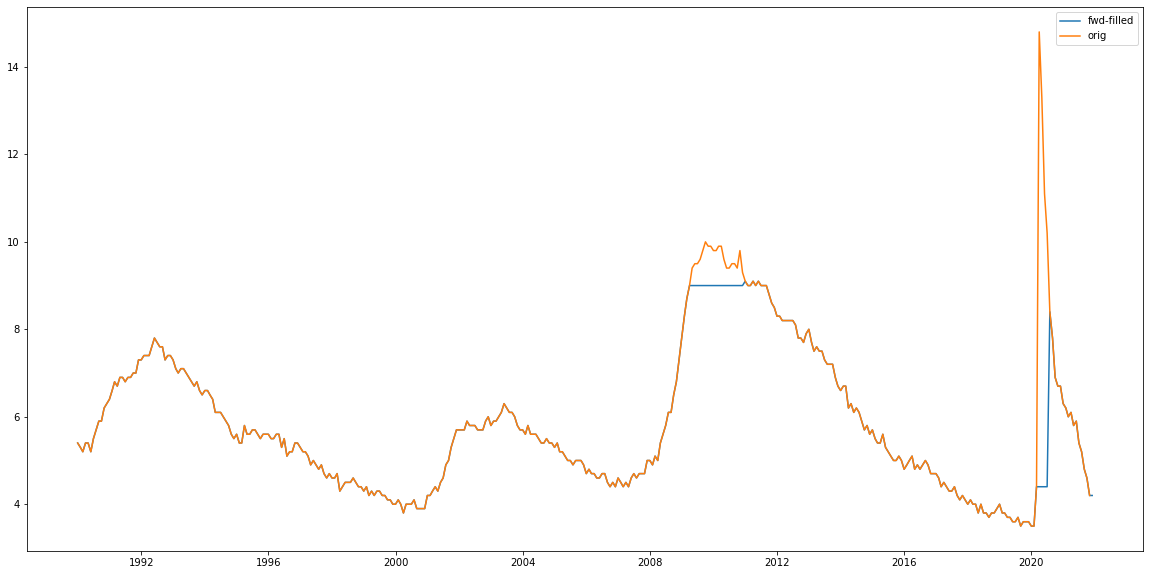

In [479]:

plt.figure(figsize=(20,10))
plt.plot( list(bls_unemployment_tops_fwdfilled_unrolled_dict.keys()),
         list(bls_unemployment_tops_fwdfilled_unrolled_dict.values()))
plt.plot( list(bls_unemployment_unrolled_dict.keys()),
         list(bls_unemployment_unrolled_dict.values()))
plt.legend(["fwd-filled","orig"]);
#plt.show()



Plot above just compares the original time series (with the top `NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE` values dropped) to this same time series with the dropped values replaced with fwd-filled values. They are pretty close

Here's what we get when we plot them against each other


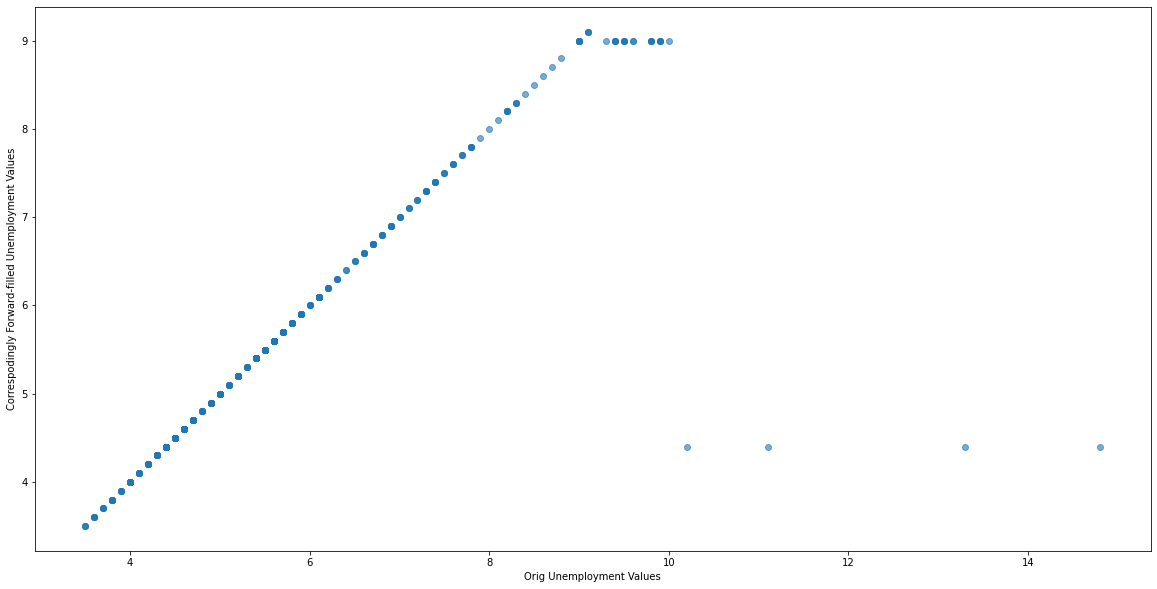

In [480]:
plt.figure(figsize=(20,10))
plt.scatter(list(bls_unemployment_unrolled_dict.values()),list(bls_unemployment_tops_fwdfilled_unrolled_dict.values()),alpha=0.6 )
plt.xlabel("Orig Unemployment Values")
plt.ylabel("Correspodingly Forward-filled Unemployment Values");

They coincide pretty well, there is no systematic bias introduced by doing the fwd-fill




**Interpolation Based on _Moving Average_**

Going to do another form of interpolation where I replace the `nan` values with a moving average of the previous `<N>` values

In [481]:
# number of previous values to include in the MA interpolation
MA_WINDOW_SIZE =  5

In [482]:
bls_unemployment_ma_filled_df = bls_unemployment_tops_df.copy()

In [483]:
bls_unemployment_tops_fwdfilled_df = bls_unemployment_tops_fwdfilled_df.set_index("Year",drop=False)


# Chapter 2 Notebook
Just some code I wrote as I followed along in chapter 2 of [_Practical Time Series Analysis_](https://www.amazon.com/dp/1492041653/ref=cm_sw_em_r_mt_dp_3YTN6VJT9KEB682ZV1FC)


In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from dateutil.relativedelta import relativedelta

import math
import random

In [485]:
RAND_SEED=42


In [486]:
YearJoined_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/git/BookRepo/Ch02/data/year_joined.csv")
emails_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/git/BookRepo/Ch02/data/emails.csv")
donations_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/git/BookRepo/Ch02/data/donations.csv")


In [487]:
donations_df.shape


(2676, 3)

In [488]:
donations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   amount     2676 non-null   float64
 1   timestamp  2676 non-null   object 
 2   user       2676 non-null   float64
dtypes: float64(2), object(1)
memory usage: 62.8+ KB


In [489]:
donations_df.describe()

,amount,user
count,2676.000000,2676.000000
mean,178.447309,477.896114
std,370.440543,287.538612
min,25.000000,0.000000
25%,25.000000,220.000000
50%,50.000000,474.000000
75%,75.000000,711.250000
max,2000.000000,998.000000


In [490]:
donations_df.head()

,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0
3,50.0,2016-07-06 12:24:55,0.0
4,50.0,2016-05-11 18:13:04,1.0


In [491]:
YearJoined_df.shape


(1000, 3)

In [492]:
YearJoined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        1000 non-null   int64 
 1   userStats   1000 non-null   object
 2   yearJoined  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [493]:
YearJoined_df.describe()

,user,yearJoined
count,1000.000000,1000.00000
mean,499.500000,2016.74100
std,288.819436,1.27967
min,0.000000,2014.00000
25%,249.750000,2016.00000
50%,499.500000,2017.00000
75%,749.250000,2018.00000
max,999.000000,2018.00000


In [494]:
YearJoined_df.head()


,user,userStats,yearJoined
0,0,silver,2014
1,1,silver,2015
2,2,silver,2016
3,3,bronze,2018
4,4,silver,2018


In [495]:
emails_df.shape

(25488, 3)

In [496]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25488 entries, 0 to 25487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   emailsOpened  25488 non-null  float64
 1   user          25488 non-null  float64
 2   week          25488 non-null  object 
dtypes: float64(2), object(1)
memory usage: 597.5+ KB


In [497]:
emails_df.describe()

,emailsOpened,user
count,25488.000000,25488.000000
mean,2.403327,498.902935
std,0.799071,282.308236
min,1.000000,1.000000
25%,2.000000,252.000000
50%,3.000000,518.000000
75%,3.000000,727.000000
max,3.000000,998.000000


In [498]:
emails_df.head()


,emailsOpened,user,week
0,3.0,1.0,2015-06-29 00:00:00
1,2.0,1.0,2015-07-13 00:00:00
2,2.0,1.0,2015-07-20 00:00:00
3,3.0,1.0,2015-07-27 00:00:00
4,1.0,1.0,2015-08-03 00:00:00


In [499]:
No_of_Diff_Stats_per_Users_df = YearJoined_df.groupby("user")["userStats"].count()
No_of_Diff_Stats_per_Users_df.head()


user
0    1
1    1
2    1
3    1
4    1
Name: userStats, dtype: int64

In [500]:
No_of_Diff_Stats_per_Users_df[No_of_Diff_Stats_per_Users_df > 1]


Series([], Name: userStats, dtype: int64)

**None** of the users had anymore than 1 status

Does any member have more than one entry in `YearJoined_df`?



In [501]:
YearJoined_df.groupby("user").count().groupby("userStats").count()



,yearJoined
userStats,
1,1000


In [502]:
YearJoined_df["user"].count()


1000

1000 different users and only 1000 different status


Any weeks with 0 opened emails?



In [503]:
emails_df[emails_df["emailsOpened"] < 1]


,emailsOpened,user,week


There are zero. So either there is an entry for every possible week per user or there are missing weeks, that will have to be assumed to be zero

Below is a list of the number of emails opened per week for a single user


In [504]:
emails_df[emails_df["user"] == 998]

,emailsOpened,user,week
25464,1.0,998.0,2017-12-04 00:00:00
25465,3.0,998.0,2017-12-11 00:00:00
25466,3.0,998.0,2017-12-18 00:00:00
25467,3.0,998.0,2018-01-01 00:00:00
25468,3.0,998.0,2018-01-08 00:00:00
25469,2.0,998.0,2018-01-15 00:00:00
25470,3.0,998.0,2018-01-22 00:00:00
25471,2.0,998.0,2018-01-29 00:00:00
25472,3.0,998.0,2018-02-05 00:00:00
25473,3.0,998.0,2018-02-12 00:00:00


There are some weeks missing.

Let's see how many weeks are missing

First create new columns that have the `week` column as a `datetime` objects



In [505]:
emails_df["week_dt"] = pd.to_datetime(emails_df["week"])


In [506]:
emails_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25488 entries, 0 to 25487
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   emailsOpened  25488 non-null  float64       
 1   user          25488 non-null  float64       
 2   week          25488 non-null  object        
 3   week_dt       25488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 796.6+ KB


In [507]:
# how many weeks starting from the earliest to latest dates in the dataframe for a single user
print(((max(emails_df[emails_df["user"] == 998].week_dt) - min(emails_df[emails_df["user"] == 998].week_dt)).days)/7 + 1," weeks")

26.0  weeks


In [508]:
# how many different weeks are *actually* in the dataframe
emails_df[emails_df["user"] == 998].shape[0]

24

So there are 26 weeks between the earliest and latest entries in `emails_df` for user 998 but only 24 different weekly entries in the data frame for user 998

Books says to input 0 for all missing weeks between the time of the earliest entry and the latest entry

Using all of the weekly timestamps in `email_df` create a new list of indices, one index per unique `week_dt` value found in `email_df` across all users


In [509]:
all_indices = pd.MultiIndex.from_product((set(emails_df.week_dt),set(emails_df.user)))


In [510]:
all_indices


MultiIndex([('2015-05-25',   1.0),
            ('2015-05-25',   3.0),
            ('2015-05-25',   5.0),
            ('2015-05-25',   6.0),
            ('2015-05-25',   9.0),
            ('2015-05-25',  10.0),
            ('2015-05-25',  14.0),
            ('2015-05-25',  16.0),
            ('2015-05-25',  20.0),
            ('2015-05-25',  21.0),
            ...
            ('2017-04-17', 973.0),
            ('2017-04-17', 977.0),
            ('2017-04-17', 982.0),
            ('2017-04-17', 984.0),
            ('2017-04-17', 987.0),
            ('2017-04-17', 991.0),
            ('2017-04-17', 992.0),
            ('2017-04-17', 993.0),
            ('2017-04-17', 995.0),
            ('2017-04-17', 998.0)],
           length=93247)

Create a new data frame where each user has events for the same set of week time stamps. If the time stamp for a user is not found in `email_df` it will be assigned 0 for `emailOpened`

In [511]:
emails_all_df = emails_df.set_index(["week_dt","user"]).reindex(all_indices, fill_value=0).reset_index()


In [512]:
emails_all_df.head()


,level_0,level_1,emailsOpened,week
0,2015-05-25,1.0,0.0,0
1,2015-05-25,3.0,0.0,0
2,2015-05-25,5.0,0.0,0
3,2015-05-25,6.0,0.0,0
4,2015-05-25,9.0,0.0,0


In [513]:
emails_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93247 entries, 0 to 93246
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   level_0       93247 non-null  datetime64[ns]
 1   level_1       93247 non-null  float64       
 2   emailsOpened  93247 non-null  float64       
 3   week          93247 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.8+ MB


In [514]:
#renaming the columns
emails_all_df.columns = ["week_dt","user","emailsOpened","to_be_dropped"]

In [515]:
emails_all_df.head()


,week_dt,user,emailsOpened,to_be_dropped
0,2015-05-25,1.0,0.0,0
1,2015-05-25,3.0,0.0,0
2,2015-05-25,5.0,0.0,0
3,2015-05-25,6.0,0.0,0
4,2015-05-25,9.0,0.0,0


In [516]:
emails_all_df.drop(["to_be_dropped"],axis=1,inplace=True)

In [517]:
emails_all_df.head()

,week_dt,user,emailsOpened
0,2015-05-25,1.0,0.0
1,2015-05-25,3.0,0.0
2,2015-05-25,5.0,0.0
3,2015-05-25,6.0,0.0
4,2015-05-25,9.0,0.0


In [518]:
emails_all_df.shape

(93247, 3)

But it's possible that there are now dates with 0 in them for a user before the date at which said user had `emailsOpened > 0`
This analysis assumes that all such dates should not exist for the user


In [519]:
#first create a list of cut-off dates
cut_off_dates_df = emails_all_df.groupby("user").week_dt.agg(["min","max"]).reset_index()


In [520]:
cut_off_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   user    539 non-null    float64       
 1   min     539 non-null    datetime64[ns]
 2   max     539 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 12.8 KB


In [521]:
cut_off_dates_df = cut_off_dates_df.reset_index()

In [522]:
cut_off_dates_df

,index,user,min,max
0,0,1.0,2015-02-09,2018-05-28
1,1,3.0,2015-02-09,2018-05-28
2,2,5.0,2015-02-09,2018-05-28
3,3,6.0,2015-02-09,2018-05-28
4,4,9.0,2015-02-09,2018-05-28
...,...,...,...,...
534,534,991.0,2015-02-09,2018-05-28
535,535,992.0,2015-02-09,2018-05-28
536,536,993.0,2015-02-09,2018-05-28
537,537,995.0,2015-02-09,2018-05-28


In [523]:
#Now clean out all rows for each user where the row comes before that user's earliest nonzero emailsopen

for _, row in cut_off_dates_df.iterrows():
    member = row["user"]
    start_date = row["min"]
    end_date = row["max"]

    member_selector = emails_all_df["user"] == member

    emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt < start_date].index,inplace=True)
    emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt > end_date].index, inplace=True)

<ipython-input-523-a2acef8b40fe>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt < start_date].index,inplace=True)
<ipython-input-523-a2acef8b40fe>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt > end_date].index, inplace=True)
<ipython-input-523-a2acef8b40fe>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt < start_date].index,inplace=True)
<ipython-input-523-a2acef8b40fe>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emails_all_df.drop(emails_all_df[member_selector][emails_all_df.week_dt > end_date].index, inplace=True)
<ipython-input-523-a2acef8b40fe>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ema

In [524]:
emails_all_df.head()

,week_dt,user,emailsOpened
0,2015-05-25,1.0,0.0
1,2015-05-25,3.0,0.0
2,2015-05-25,5.0,0.0
3,2015-05-25,6.0,0.0
4,2015-05-25,9.0,0.0


In [525]:
emails_all_df.tail()


,week_dt,user,emailsOpened
93242,2017-04-17,991.0,0.0
93243,2017-04-17,992.0,0.0
93244,2017-04-17,993.0,0.0
93245,2017-04-17,995.0,3.0
93246,2017-04-17,998.0,0.0


In [526]:
emails_all_df.shape


(93247, 3)

Author wants to relate donations to the number of emails opened per week.

Current donations are recorded in `donations_df`  on a non-weekly basis.

So to relate the two will first aggregate donations to a weekly number


In [527]:
donations_df["timestamp_dt"] = pd.to_datetime(donations_df["timestamp"])


In [528]:
donations_df.set_index("timestamp_dt",inplace=True)
donations_df.head()

,amount,timestamp,user
timestamp_dt,,,
2017-11-12 11:13:44,25.0,2017-11-12 11:13:44,0.0
2015-08-25 19:01:45,50.0,2015-08-25 19:01:45,0.0
2015-03-26 12:03:47,25.0,2015-03-26 12:03:47,0.0
2016-07-06 12:24:55,50.0,2016-07-06 12:24:55,0.0
2016-05-11 18:13:04,50.0,2016-05-11 18:13:04,1.0


In [529]:
agg_donations = donations_df.groupby("user").apply(lambda df: df["amount"].resample("W-MON").sum().dropna())


In [530]:
#I think this is needed maybe a bug in her code
agg_donations = agg_donations.reset_index()


In [531]:
agg_donations.head()


,user,timestamp_dt,amount
0,0.0,2015-03-30,25.0
1,0.0,2015-04-06,0.0
2,0.0,2015-04-13,0.0
3,0.0,2015-04-20,0.0
4,0.0,2015-04-27,0.0


Now will join `agg_donations` to `email_all_df` by date

In [532]:
merged_df = pd.DataFrame()


In [533]:
for user, user_emails in emails_all_df.groupby("user"):
    #print(user,user_email)
    user_donations = agg_donations[agg_donations["user"] == user]

    user_donations.set_index("timestamp_dt", inplace=True)
    user_emails.set_index("week_dt", inplace=True)

    user_emails = emails_all_df[emails_all_df["user"] == user]
    user_emails = user_emails.sort_values("week_dt").set_index("week_dt")

    df = pd.merge(user_emails, user_donations, how="left", left_index=True, right_index=True)
    df.fillna(0, inplace=True)
    df["user"] = df.user_x

    if merged_df.empty:
        merged_df = df.reset_index()[["user","week_dt","emailsOpened","amount"]]
    else:
        merged_df = merged_df.append(df.reset_index()[["user","week_dt","emailsOpened","amount"]])



In [534]:
merged_df.head()

,user,week_dt,emailsOpened,amount
0,1.0,2015-02-09,0.0,0.0
1,1.0,2015-02-16,0.0,0.0
2,1.0,2015-02-23,0.0,0.0
3,1.0,2015-03-02,0.0,0.0
4,1.0,2015-03-09,0.0,0.0


Now we want to try to predict the donation amount as a function of the emails opened.

In order to do that we need to shift the donation amounts ahead 1 week so that our predictions don't suffer from _lookahead (see book for meaning)_


In [535]:
single_user_df = merged_df[merged_df["user"] == 998]
single_user_df[single_user_df["amount"]>0].head()


,user,week_dt,emailsOpened,amount
152,998.0,2018-01-08,3.0,50.0


In [536]:
single_user_df["target_amount"] = single_user_df["amount"].shift(1)
single_user_df = single_user_df.fillna(0)
single_user_df

<ipython-input-536-a63b7af87754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_user_df["target_amount"] = single_user_df["amount"].shift(1)


,user,week_dt,emailsOpened,amount,target_amount
0,998.0,2015-02-09,0.0,0.0,0.0
1,998.0,2015-02-16,0.0,0.0,0.0
2,998.0,2015-02-23,0.0,0.0,0.0
3,998.0,2015-03-02,0.0,0.0,0.0
4,998.0,2015-03-09,0.0,0.0,0.0
...,...,...,...,...,...
168,998.0,2018-04-30,3.0,0.0,0.0
169,998.0,2018-05-07,3.0,0.0,0.0
170,998.0,2018-05-14,3.0,0.0,0.0
171,998.0,2018-05-21,3.0,0.0,0.0


In [537]:
# proving to myself the shift worked
selector = (single_user_df["target_amount"]>0) | (single_user_df["amount"]>0)

single_user_df.iloc[130:160]


,user,week_dt,emailsOpened,amount,target_amount
130,998.0,2017-08-07,0.0,0.0,0.0
131,998.0,2017-08-14,0.0,0.0,0.0
132,998.0,2017-08-21,0.0,0.0,0.0
133,998.0,2017-08-28,0.0,0.0,0.0
134,998.0,2017-09-04,0.0,0.0,0.0
135,998.0,2017-09-11,0.0,0.0,0.0
136,998.0,2017-09-18,0.0,0.0,0.0
137,998.0,2017-09-25,0.0,0.0,0.0
138,998.0,2017-10-02,0.0,0.0,0.0
139,998.0,2017-10-09,0.0,0.0,0.0


In [538]:
YearJoined_df[YearJoined_df["user"] == 998]

,user,userStats,yearJoined
998,998,bronze,2017


## Cleaning Your Data
Going to work with BLS unemployment data

I need to create two data frames using BLS data:

1. Random months have missing data
1. A data frame that contains only contains the months in which the 10 highest unemployment rates are found

In [539]:
# constants used to control execution in subsequent cells
PERCENT_MISSING_ITEMS = 30
PERCENT_CHANCE_TO_REMOVE = 75
NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE = 25

In [540]:
bls_unemployment_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/Data/BLS_Unemployment/SeriesReport-20211216122642_df8ed4_Sheet1.csv")
bls_unemployment_df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5


In [541]:
bls_unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    32 non-null     int64  
 1   Jan     32 non-null     float64
 2   Feb     32 non-null     float64
 3   Mar     32 non-null     float64
 4   Apr     32 non-null     float64
 5   May     32 non-null     float64
 6   Jun     32 non-null     float64
 7   Jul     32 non-null     float64
 8   Aug     32 non-null     float64
 9   Sep     32 non-null     float64
 10  Oct     32 non-null     float64
 11  Nov     32 non-null     float64
 12  Dec     31 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 3.4 KB


In [542]:
List_Of_Month_Names = list(bls_unemployment_df.columns[1:])
List_Of_Years = list(bls_unemployment_df["Year"])


In [543]:
Number_Of_Items_To_Remove = math.ceil((PERCENT_MISSING_ITEMS/100.0) * bls_unemployment_df.shape[0])
print("Number of items to remove = ", Number_Of_Items_To_Remove)

Number of items to remove =  10


In [544]:
bls_unemployment_rand_removed_df = bls_unemployment_df.copy()


Just confirming that I picked a subset of `bls_unemployment_df`


In [545]:
bls_unemployment_df.shape

(32, 13)

In [546]:
indices_to_clear = random.sample(list(bls_unemployment_rand_removed_df.index),Number_Of_Items_To_Remove)


In [547]:
#clear them out
bls_unemployment_rand_removed_df.loc[indices_to_clear,List_Of_Month_Names] = None


In [548]:
bls_unemployment_df.iloc[indices_to_clear]


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
31,2021,6.3,6.2,6.0,6.1,5.8,5.9,5.4,5.2,4.8,4.6,4.2,NaN
21,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
30,2020,3.5,3.5,4.4,14.8,13.3,11.1,10.2,8.4,7.8,6.9,6.7,6.7
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
10,2000,4.0,4.1,4.0,3.8,4.0,4.0,4.0,4.1,3.9,3.9,3.9,3.9
23,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
29,2019,4.0,3.8,3.8,3.7,3.7,3.6,3.6,3.7,3.5,3.6,3.6,3.6
19,2009,7.8,8.3,8.7,9.0,9.4,9.5,9.5,9.6,9.8,10.0,9.9,9.9
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


confirming they are cleared out now


In [549]:
bls_unemployment_rand_removed_df.iloc[indices_to_clear]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
31,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [550]:
#not everything is gone
bls_unemployment_rand_removed_df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5


Now going to create a DF that will just have the top `NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE` largest months


In [551]:
bls_unemployment_tops_df = bls_unemployment_df.copy()


In [552]:
bls_unemployment_tops_df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5


In [553]:
bls_unemployment_tops_df["Year"].max()

2021

In [554]:
bls_unemployment_tops_df["Year"].min()


1990

In [555]:
bls_unemployment_tops_df[ (bls_unemployment_tops_df["Year"]>=bls_unemployment_tops_df["Year"].min()) | (bls_unemployment_tops_df["Year"]<=bls_unemployment_tops_df["Year"].max())]


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
6,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
7,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


In [556]:
bls_unemployment_tops_df.iloc[:,:].max()

Year    2021.0
Jan        9.8
Feb        9.8
Mar        9.9
Apr       14.8
May       13.3
Jun       11.1
Jul       10.2
Aug        9.6
Sep        9.8
Oct       10.0
Nov        9.9
Dec        9.9
dtype: float64

In [557]:
my_month_year_unemp_dict = {}

In [558]:
#now that I'm using a full IDE I prolly won't need to do so much printing out in my notebook (I hope).
print(my_month_year_unemp_dict)

{}


In [559]:
#Unroll the DF into a dictionary of unemp numbers and (Year,Month) tuples
for myrow in bls_unemployment_tops_df.iterrows():
    temp_row = myrow[1]
    temp_row_year = temp_row["Year"]

    for mymonth in List_Of_Month_Names:
        my_month_year_unemp_dict[mymonth+"_"+str(temp_row_year)] = temp_row[mymonth]



#Sort the dictionary by the values (the unemp numbers)
my_month_year_unemp_sorted_list = sorted(my_month_year_unemp_dict.items(), key=lambda x:x[1])
my_month_year_unemp_top10_dict = dict(my_month_year_unemp_sorted_list[-1*NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE:])
#Pick the largest 10
print(my_month_year_unemp_top10_dict)





{'Dec_2010.0': 9.3, 'May_2009.0': 9.4, 'Jun_2010.0': 9.4, 'Jul_2010.0': 9.4, 'Oct_2010.0': 9.4, 'Jun_2009.0': 9.5, 'Jul_2009.0': 9.5, 'Aug_2010.0': 9.5, 'Sep_2010.0': 9.5, 'Aug_2009.0': 9.6, 'May_2010.0': 9.6, 'Sep_2009.0': 9.8, 'Jan_2010.0': 9.8, 'Feb_2010.0': 9.8, 'Nov_2010.0': 9.8, 'Nov_2009.0': 9.9, 'Dec_2009.0': 9.9, 'Mar_2010.0': 9.9, 'Apr_2010.0': 9.9, 'Oct_2009.0': 10.0, 'Jul_2020.0': 10.2, 'Jun_2020.0': 11.1, 'May_2020.0': 13.3, 'Apr_2020.0': 14.8, 'Dec_2021.0': nan}


In [560]:
list_of_month_year_to_keep = []

for monthyear in my_month_year_unemp_top10_dict:
    temp_month, temp_year = monthyear.split("_")
    temp_year = float(temp_year)
    list_of_month_year_to_keep.append((temp_month,temp_year))

print(list_of_month_year_to_keep)

[('Dec', 2010.0), ('May', 2009.0), ('Jun', 2010.0), ('Jul', 2010.0), ('Oct', 2010.0), ('Jun', 2009.0), ('Jul', 2009.0), ('Aug', 2010.0), ('Sep', 2010.0), ('Aug', 2009.0), ('May', 2010.0), ('Sep', 2009.0), ('Jan', 2010.0), ('Feb', 2010.0), ('Nov', 2010.0), ('Nov', 2009.0), ('Dec', 2009.0), ('Mar', 2010.0), ('Apr', 2010.0), ('Oct', 2009.0), ('Jul', 2020.0), ('Jun', 2020.0), ('May', 2020.0), ('Apr', 2020.0), ('Dec', 2021.0)]


In [561]:
#create a new DF containing years 1990-2021 and months Jan-Dec
#fill in the values from DF
#the unassigned values make them NaN
for mymonth in List_Of_Month_Names:
    #print("type mymonth ",type(mymonth))
    #print("mymonth in ")
    for myyear in List_Of_Years:
        temp_year = float(myyear)

        #if you want to keep only the top NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE
        #if not( (mymonth,temp_year) in list_of_month_year_to_keep):

        #if you want to remove the top NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE
        if  (mymonth,temp_year) in list_of_month_year_to_keep:


            selector = (bls_unemployment_tops_df["Year"] == temp_year)
            bls_unemployment_tops_df.loc[selector,mymonth] = None


In [562]:
bls_unemployment_tops_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
6,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
7,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


That's a lot of data points removed. Maybe I should do the opposite?

Yes better to remove the top 10. Rename `NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_KEEP` to `NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TONUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE` More data there needed to do the interpolation/inputation

According to the book:

* _Inputation_: Replacing missing data points based on observations made about the entire data set
* _Interploation_: Replacing missing data points with estimates based on the values of neighboring (in time) data points
* _Deletion Affected Time Periods_: Remove all data for time periods in which there is missing data


**Interpolation Based on _forward fill_**

Where _forward fill_ is replacing a missing data point with the value of it's immediately preceding neight

In [563]:
#copy the original. will do the forward fill as described in the book in this new dataframe
bls_unemployment_tops_fwdfilled_df = bls_unemployment_tops_df.copy()
bls_unemployment_tops_fwdfilled_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
6,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
7,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


**Doing the forward fill**

I want to select entries in the dataframe by name.

SO I will need to set the index to the column "Year"

Once I'm done I'll just run `reset_index(drop=True)` to get it back


In [564]:
bls_unemployment_tops_fwdfilled_df = bls_unemployment_tops_fwdfilled_df.set_index("Year",drop=False)
bls_unemployment_tops_fwdfilled_df.head(3)


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,,
1990,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1991,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
1992,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4


In [565]:

bls_unemployment_tops_fwdfilled_df.loc[1990,"Mar"]

5.2

In [566]:
##########################
#
# new forward fill routine
#
# Not super robust. Shortcomings:
#
##########################

for year_idx in range(len(List_Of_Years)):
    for month_idx in range(len(List_Of_Month_Names)):

        #if the entry is nan
        if math.isnan( bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx], List_Of_Month_Names[month_idx]] ):

            if (List_Of_Month_Names[month_idx] == List_Of_Month_Names[0])  and (List_Of_Years[year_idx] == min(List_Of_Years)):
                # the Oldest entry in the table is None. So make it equal to the next value in time
                #replace Nan with value of the next month of the same year as in this case there is no previous month data
                bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx], List_Of_Month_Names[month_idx]] = bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[1]]

            elif List_Of_Month_Names[month_idx]  == List_Of_Month_Names[-1]:
                #The Youngest entry in the table or just an entry in Dec is None. Make it equal to the immediately preceding value (preceding month)
                bls_unemployment_tops_fwdfilled_df.loc[ List_Of_Years[year_idx], List_Of_Month_Names[month_idx] ] = bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[-2]]

            elif List_Of_Month_Names[month_idx]  == List_Of_Month_Names[0]:
                #Jan of  List_Of_Years[year_idx] is Nan, Pick Dec of previous year to replace
                temp_year_idx = year_idx - 1

                #ok i don't trust this will always work so looking for errors. will remove once debugged
                if temp_year_idx < 0:
                    print("error for year ",List_Of_Years[year_idx]," month ",List_Of_Month_Names[month_idx],"temp_year_idx is negative")

                bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[month_idx]]  = bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[temp_year_idx],List_Of_Month_Names[-1]]

            else:
                #replace if with the previous month of the same year
                temp_month_idx = month_idx - 1

                #ok i don't trust this will always work so looking for errors. will remove once debugged
                if temp_month_idx < 0:
                    print("error for year ",List_Of_Years[year_idx]," month ",List_Of_Month_Names[month_idx],"temp_month_idx is negative")

                bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[month_idx] ]  = bls_unemployment_tops_fwdfilled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[temp_month_idx]]









printing it out to confirm the `NaN` values got interpolated away



In [567]:
bls_unemployment_tops_fwdfilled_df = bls_unemployment_tops_fwdfilled_df.reset_index(drop=True)
bls_unemployment_tops_fwdfilled_df


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
5,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
6,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
7,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
8,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4
9,1999,4.3,4.4,4.2,4.3,4.2,4.3,4.3,4.2,4.2,4.1,4.1,4.0


In [568]:
def return_month_number(month_name):
    """funciton takes a value from List_Of_Month_Names and converts it to the ordinal value of that value interpreting the value as the month name"""
    for lomn_idx, lomn_val in enumerate(List_Of_Month_Names):
        if month_name == lomn_val:
            return (lomn_idx + 1)

    print("Error: Could not find ",month_name," in List_Of_Month_Names = ",List_Of_Month_Names)


Going to plot the two dataframes (the non-fwd-filled and fwd-filled).

In [569]:

#Unroll the DF into a dictionary of unemp numbers and (Year,Month) tuples
# TODO: Make this a function: It's used in a lot of places
bls_unemployment_tops_fwdfilled_unrolled_dict = {}

bls_unemployment_unrolled_dict = {}

for myrow in bls_unemployment_tops_fwdfilled_df.iterrows():
    #do this so i can select columns by name (prob other ways to do it)
    temp_row = myrow[1]

    temp_row_year = temp_row["Year"]

    for mymonth in List_Of_Month_Names:
        month_number = return_month_number(mymonth)
        #always assuming the date of the report is the 1st. I think it's the first Friday of every month.
        #TODO: convert date to always be the first friday of that (month,year) tuple
        bls_unemployment_tops_fwdfilled_unrolled_dict[datetime.date(year=int(temp_row_year),month=month_number,day=1)] = temp_row[mymonth]



#Sort the dictionary by the values (the unemp numbers)
bls_unemployment_tops_fwdfilled_unrolled_list = sorted(bls_unemployment_tops_fwdfilled_unrolled_dict.items(), key=lambda x:x[0])
bls_unemployment_tops_fwdfilled_unrolled_dict = dict(bls_unemployment_tops_fwdfilled_unrolled_list)



for myrow in bls_unemployment_df.iterrows():
    #do this so i can select columns by name (prob other ways to do it)
    temp_row = myrow[1]

    temp_row_year = temp_row["Year"]

    for mymonth in List_Of_Month_Names:
        month_number = return_month_number(mymonth)
        #always assuming the date of the report is the 1st. I think it's the first Friday of every month.
        #TODO: convert date to always be the first friday of that (month,year) tuple
        #if not(math.isnan(temp_row[mymonth])):
        bls_unemployment_unrolled_dict[datetime.date(year=int(temp_row_year),month=month_number,day=1)] = temp_row[mymonth]

#Sort the dictionary by the values (the unemp numbers)
bls_unemployment_unrolled_list = sorted(bls_unemployment_unrolled_dict.items(), key=lambda x:x[0])
bls_unemployment_unrolled_dict = dict(bls_unemployment_unrolled_list)


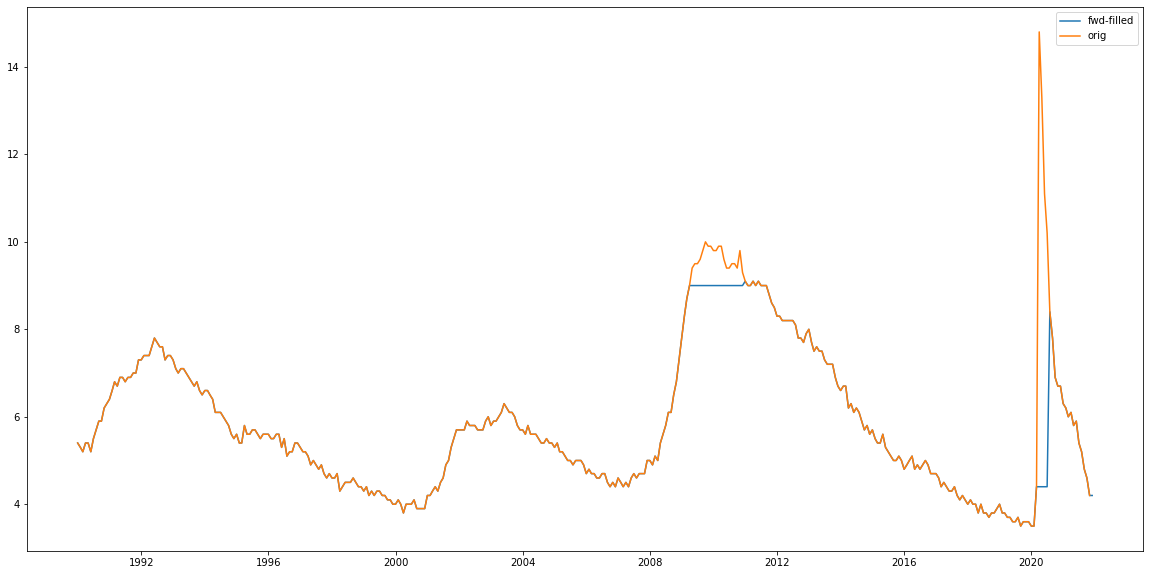

In [570]:

plt.figure(figsize=(20,10))
plt.plot( list(bls_unemployment_tops_fwdfilled_unrolled_dict.keys()),
         list(bls_unemployment_tops_fwdfilled_unrolled_dict.values()))
plt.plot( list(bls_unemployment_unrolled_dict.keys()),
         list(bls_unemployment_unrolled_dict.values()))
plt.legend(["fwd-filled","orig"]);
#plt.show()



Plot above just compares the original time series (with the top `NUMBER_OF_MAX_UNEMPLOYMENT_MONTHS_TO_REMOVE` values dropped) to this same time series with the dropped values replaced with fwd-filled values. They are pretty close

Here's what we get when we plot them against each other


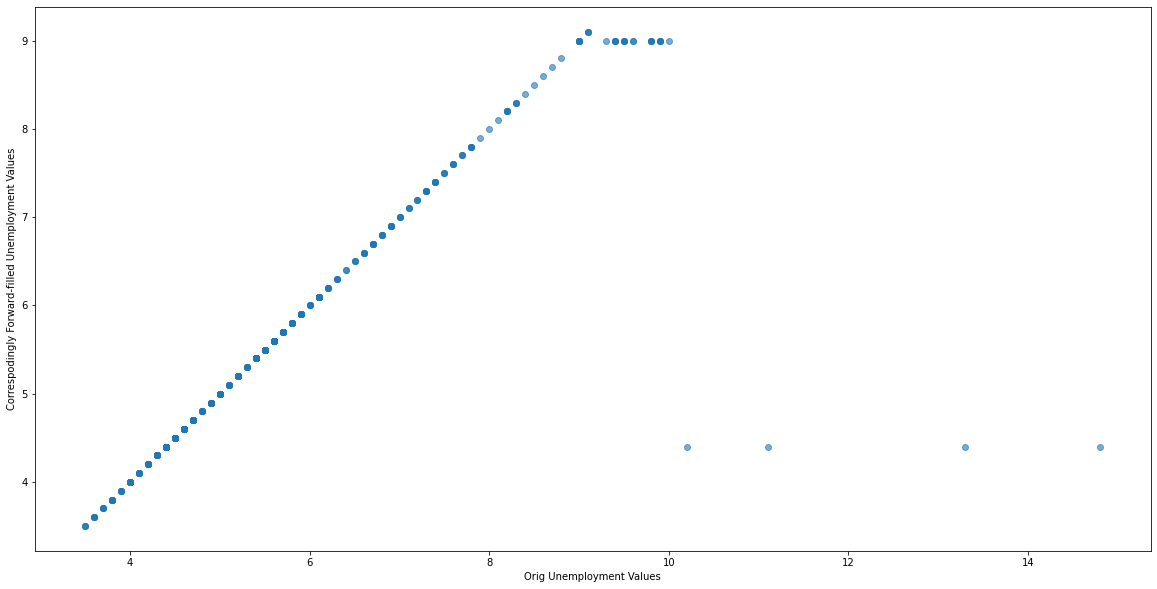

In [571]:
plt.figure(figsize=(20,10))
plt.scatter(list(bls_unemployment_unrolled_dict.values()),list(bls_unemployment_tops_fwdfilled_unrolled_dict.values()),alpha=0.6 )
plt.xlabel("Orig Unemployment Values")
plt.ylabel("Correspodingly Forward-filled Unemployment Values");

They coincide pretty well, there is no systematic bias introduced by doing the fwd-fill




**Interpolation Based on _Moving Average (without lookahead)_**

Going to do another form of interpolation where I replace the `nan` values with a moving average of the previous `<N>` values

In [572]:
# number of previous values to include in the MA interpolation
MA_WINDOW_SIZE =  5

In [573]:
bls_unemployment_ma_filled_df = bls_unemployment_tops_df.copy()

In [574]:
bls_unemployment_ma_filled_df = bls_unemployment_ma_filled_df.set_index("Year",drop=False)
bls_unemployment_ma_filled_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,,
1990,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1991,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
1992,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
1993,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
1994,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5
1995,1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6
1996,1996,5.6,5.5,5.5,5.6,5.6,5.3,5.5,5.1,5.2,5.2,5.4,5.4
1997,1997,5.3,5.2,5.2,5.1,4.9,5.0,4.9,4.8,4.9,4.7,4.6,4.7
1998,1998,4.6,4.6,4.7,4.3,4.4,4.5,4.5,4.5,4.6,4.5,4.4,4.4


In [575]:
#yes this code is crufty: I'm just trying to "take notes" in a book I'm reading

######
#
# fill via MA interpolation
#
######

for year_idx in range(len(List_Of_Years)):
    for month_idx in range(len(List_Of_Month_Names)):

        #if the entry is nan
        if math.isnan( bls_unemployment_ma_filled_df.loc[List_Of_Years[year_idx], List_Of_Month_Names[month_idx]] ):

            if (List_Of_Month_Names[month_idx] == List_Of_Month_Names[0])  and (List_Of_Years[year_idx] == min(List_Of_Years)):
                # the Oldest entry in the table is None. So make it equal to the avg of the next MA_WINDOW_SIZE values
                #replace Nan with value of the next month of the same year as in this case there is no previous month data
                bls_unemployment_ma_filled_df.loc[List_Of_Years[year_idx], List_Of_Month_Names[month_idx]] = bls_unemployment_ma_filled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[1:MA_WINDOW_SIZE+1]].mean()

            #if the month comes before June which is List_Of_Month_Names[:month_idx], month_idx==5
            elif month_idx < 5:
                #use what you got for that year
                temp_sum = bls_unemployment_ma_filled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[:month_idx]].sum()

                #plus whatever you need  from the previous year to complex the window
                temp_year_idx = year_idx - 1
                temp_months_you_got = len(List_Of_Month_Names[:month_idx])
                temp_months_you_got_left = MA_WINDOW_SIZE - temp_months_you_got
                temp_sum += bls_unemployment_ma_filled_df.loc[List_Of_Years[temp_year_idx],List_Of_Month_Names[-1*temp_months_you_got_left:]].sum()

                #take the avg
                bls_unemployment_ma_filled_df.loc[List_Of_Years[year_idx],List_Of_Month_Names[month_idx]] = temp_sum / MA_WINDOW_SIZE

            else:
                #It's not the oldest point in time
                #it's June or later
                #just averge the previous MA_WINDOW_SIZE of that year
                bls_unemployment_ma_filled_df.loc[List_Of_Years[year_idx], List_Of_Month_Names[month_idx]] =bls_unemployment_ma_filled_df.loc[List_Of_Years[year_idx], List_Of_Month_Names[month_idx - MA_WINDOW_SIZE:month_idx]].mean()

Result after doing interpolation using MA


In [576]:

bls_unemployment_ma_filled_df = bls_unemployment_ma_filled_df.reset_index(drop=True)
bls_unemployment_ma_filled_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.400000,5.300000,5.200000,5.400000,5.400000,5.200000,5.500000,5.700000,5.900000,5.900000,6.200000,6.300000
1,1991,6.400000,6.600000,6.800000,6.700000,6.900000,6.900000,6.800000,6.900000,6.900000,7.000000,7.000000,7.300000
2,1992,7.300000,7.400000,7.400000,7.400000,7.600000,7.800000,7.700000,7.600000,7.600000,7.300000,7.400000,7.400000
3,1993,7.300000,7.100000,7.000000,7.100000,7.100000,7.000000,6.900000,6.800000,6.700000,6.800000,6.600000,6.500000
4,1994,6.600000,6.600000,6.500000,6.400000,6.100000,6.100000,6.100000,6.000000,5.900000,5.800000,5.600000,5.500000
5,1995,5.600000,5.400000,5.400000,5.800000,5.600000,5.600000,5.700000,5.700000,5.600000,5.500000,5.600000,5.600000
6,1996,5.600000,5.500000,5.500000,5.600000,5.600000,5.300000,5.500000,5.100000,5.200000,5.200000,5.400000,5.400000
7,1997,5.300000,5.200000,5.200000,5.100000,4.900000,5.000000,4.900000,4.800000,4.900000,4.700000,4.600000,4.700000
8,1998,4.600000,4.600000,4.700000,4.300000,4.400000,4.500000,4.500000,4.500000,4.600000,4.500000,4.400000,4.400000
9,1999,4.300000,4.400000,4.200000,4.300000,4.200000,4.300000,4.300000,4.200000,4.200000,4.100000,4.100000,4.000000


Going to plot the two dataframes (the non-ma-filled and ma-filled).


In [577]:

#Unroll the DF into a dictionary of unemp numbers and (Year,Month) tuples
# TODO: Make this a function: It's used in a lot of places
bls_unemployment_ma_filled_df_unrolled_dict = {}


for myrow in bls_unemployment_ma_filled_df.iterrows():
    #do this so i can select columns by name (prob other ways to do it)
    temp_row = myrow[1]

    temp_row_year = temp_row["Year"]

    for mymonth in List_Of_Month_Names:
        month_number = return_month_number(mymonth)
        #always assuming the date of the report is the 1st. I think it's the first Friday of every month.
        #TODO: convert date to always be the first friday of that (month,year) tuple
        bls_unemployment_ma_filled_df_unrolled_dict[datetime.date(year=int(temp_row_year),month=month_number,day=1)] = temp_row[mymonth]



#Sort the dictionary by the values (the unemp numbers)
bls_unemployment_ma_filled_df_unrolled_list = sorted(bls_unemployment_ma_filled_df_unrolled_dict.items(), key=lambda x:x[0])
bls_unemployment_ma_filled_df_unrolled_dict = dict(bls_unemployment_ma_filled_df_unrolled_list)




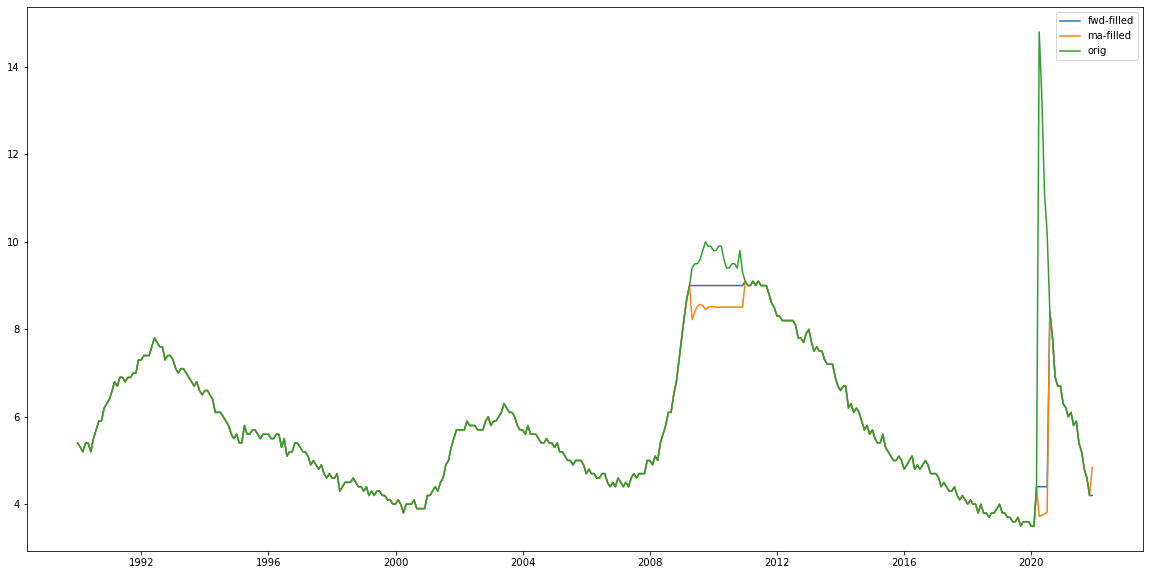

In [581]:

plt.figure(figsize=(20,10))
plt.plot( list(bls_unemployment_tops_fwdfilled_unrolled_dict.keys()),
         list(bls_unemployment_tops_fwdfilled_unrolled_dict.values()))
plt.plot( list(bls_unemployment_ma_filled_df_unrolled_dict.keys()),
         list(bls_unemployment_ma_filled_df_unrolled_dict.values()))
plt.plot( list(bls_unemployment_unrolled_dict.keys()),
         list(bls_unemployment_unrolled_dict.values()))
plt.legend(["fwd-filled","ma-filled","orig"])
plt.show();

I think fwd-filled was better. Maybe I can calculate RSME to show that.



**Interpolation Based on _Linear Fit of prior data points_ (without lookahead)**

Going to skip

## Upsampling and Downsampling


### Downsampleing

#### Match again data at a lower frequency

Going to take the original unemployment data and create a re-sampled version that is sampled across year






In [589]:
bls_unemployment2_dict = {"Date":list(bls_unemployment_unrolled_dict.keys()),"Unemployment_Rate":list(bls_unemployment_unrolled_dict.values())}
bls_unemployment2_df = pd.DataFrame(bls_unemployment2_dict)
bls_unemployment2_df["Date_dt"] = pd.to_datetime(bls_unemployment2_df["Date"])
bls_unemployment2_df.drop(["Date"],axis=1,inplace=True)
bls_unemployment2_df = bls_unemployment2_df.set_index("Date_dt",drop=False)

bls_unemployment2_df.head()


,Unemployment_Rate,Date_dt
Date_dt,,
1990-01-01,5.4,1990-01-01
1990-02-01,5.3,1990-02-01
1990-03-01,5.2,1990-03-01
1990-04-01,5.4,1990-04-01
1990-05-01,5.4,1990-05-01


In [590]:
bls_unemployment2_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-01 to 2021-12-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unemployment_Rate  383 non-null    float64       
 1   Date_dt            384 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


In [594]:
bls_unemployment_yearly_avged_df = bls_unemployment2_df.resample("Y").mean()
bls_unemployment_yearly_avged_df

,Unemployment_Rate
Date_dt,
1990-12-31,5.616667
1991-12-31,6.850000
1992-12-31,7.491667
1993-12-31,6.908333
1994-12-31,6.100000
1995-12-31,5.591667
1996-12-31,5.408333
1997-12-31,4.941667
1998-12-31,4.500000


## Smoothing Data


### Exponential smoothing

Simple exponential smoothing:

```
y_T+1 = alpha * y_T + alpha * (1 - alpha) * y_T-1 + alpha*(1 - alpha)^2 * y_T-2 + ...
```

Going to use a different data set. Basically the airline passengers data set from Box and Jenkins (1976): _Times Series Analysis: Forecasting and Control_, p. 531

In [599]:
airlinePassengers_df = pd.read_csv("/Users/magreen/Dropbox/PERSONAL/Documents/Practical_Time_Series_Analysis/git/BookRepo/Ch02/data/AirPassengers.csv",names=["Date","No_Passengers"])

In [600]:
airlinePassengers_df.head()


,Date,No_Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
